#### Training the VADER Algorithm 

In [9]:
import pathlib
import sklearn
import numpy
import nltk
from nltk.corpus import stopwords
from collections import Counter
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from nltk.sentiment import vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer



In [ ]:
trump_tweets = load_files("Trump_tweets", encoding="utf-8", decode_error="ignore")
tweets = trump_tweets.data  
vader_model = SentimentIntensityAnalyzer()

def sentiment_classifier(score): 
    """
    Returns segregated score value as positive, negative or neutral.
    :param score: vader's score dictionary 

    :rtype: string
    :return: sentiment of the text input as postive, negative or neutral 
    """
    if score['compound'] == 0.0:
        return 'neutral'
    elif score['compound'] > 0.0:
        return 'positive'
    elif score['compound'] < 0:
        return'negative'
    
def evaluation_metrics(true_labels, predicted_labels, experiment_name):
    '''
    Prints the classification report. 
    :param true_labels: the correct labels 
    :param predicted_labels: the label that vader assigns
    :param experiment_name: the name of the experiemtn under observation. 

    :return: None
    '''
    print('CLASSIFICATION REPORT:', experiment_name)
    print(classification_report(true_labels, predicted_labels))
    
    

true_label = []
predicted_label = []

true_value = trump_tweets.target
label_names = trump_tweets.target_names

for tweet, label in zip(tweets, true_value):
    true_label.append(label_names[label])  
    scores = vader_model.polarity_scores(tweet)  
    predicted_label.append(sentiment_classifier(scores)) 


evaluation_metrics(true_label, predicted_label, "TASK 1: VADER as is")
    

CLASSIFICATION REPORT: TASK 1: VADER as is
              precision    recall  f1-score   support

    negative       0.84      0.85      0.84     14392
     neutral       0.82      0.80      0.81     12389
    positive       0.92      0.93      0.92     29793

    accuracy                           0.88     56574
   macro avg       0.86      0.86      0.86     56574
weighted avg       0.88      0.88      0.88     56574



#### TSV File Method

In [ ]:
import nltk
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report

#Download VADER lexicon
nltk.download('vader_lexicon')

#Setting the model
vader_model = SentimentIntensityAnalyzer()

#Load in the dataset
test_file_path = "sentiment-topic-test.tsv"
test_df = pd.read_csv(test_file_path, sep="\t")

#Set the classification ranges
def sentiment_classifier(score): 
    if score['compound'] == 0.0:
        return 'neutral'
    elif score['compound'] > 0.0:
        return 'positive'
    elif score['compound'] < 0:
        return 'negative'

#Apply the algorithm for classification
test_df['predicted_sentiment'] = test_df['sentence'].apply(lambda x: sentiment_classifier(vader_model.polarity_scores(x)))

#Generate the classification report
classification_rep = classification_report(test_df['sentiment'], test_df['predicted_sentiment'])

#Print the report
print("=== SENTIMENT CLASSIFICATION REPORT ===")
print(classification_rep)


=== SENTIMENT CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         6
     neutral       0.33      0.50      0.40         6
    positive       0.43      0.50      0.46         6

    accuracy                           0.33        18
   macro avg       0.25      0.33      0.29        18
weighted avg       0.25      0.33      0.29        18



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jonashubbers/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
# Print each sentence with its predicted sentiment
print("\n=== SENTENCE CLASSIFICATION EXAMPLES ===")
for idx, row in test_df.iterrows():
    print(f"Sentence: {row['sentence']}")
    print(f"Predicted Sentiment: {row['predicted_sentiment']}")
    print("-" * 50)  # Separator for readability



=== SENTENCE CLASSIFICATION EXAMPLES ===
Sentence: The atmosphere at the stadium tonight was electric.
Predicted Sentiment: neutral
--------------------------------------------------
Sentence: The game was so intense I forgot to breathe at times. What a win!
Predicted Sentiment: positive
--------------------------------------------------
Sentence: It had me hooked from the first chapter.
Predicted Sentiment: neutral
--------------------------------------------------
Sentence: It’s more of a slow burn than a page-turner, but it’s well-written, I guess.
Predicted Sentiment: neutral
--------------------------------------------------
Sentence: It’s split into two timelines, which keeps it interesting but also a bit confusing at times.
Predicted Sentiment: negative
--------------------------------------------------
Sentence: I could watch this film a hundred times and still find something new to love about it.
Predicted Sentiment: positive
--------------------------------------------------

#### CSV File Method

In [ ]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report

#Loading the file and chnage encoding in case issues
#Had some issues with utf-8
test_file_path = "sentiment-topic-test.csv" 
try:
    test_data = pd.read_csv(test_file_path, encoding="utf-8")
except UnicodeDecodeError:
    test_data = pd.read_csv(test_file_path, encoding="latin-1")

print("Dataset Columns:", test_data.columns)

#In case errors occur
if "sentence" not in test_data.columns or "sentiment" not in test_data.columns:
    raise ValueError("Dataset must contain 'sentence' and 'sentiment' columns.")

#Setting the model
vader_model = SentimentIntensityAnalyzer()

#Setting the classification ranges for the VADER model
#Note: 0.05 was used in this instance inside of 0.00 but the results were the same
#So it was left like this.
def sentiment_classifier(score):
    if score["compound"] >= 0.05:
        return "positive"
    elif score["compound"] <= -0.05:
        return "negative"
    else:
        return "neutral"

#Using VADER for the sentiment analysis part
test_data["predicted_sentiment"] = test_data["sentence"].apply(lambda x: sentiment_classifier(vader_model.polarity_scores(str(x))))

#Writing of the classification report
print("Classification Report:")
print(classification_report(test_data["sentiment"], test_data["predicted_sentiment"], labels=["negative", "neutral", "positive"]))


Dataset Columns: Index(['sentence_id', 'sentence', 'sentiment', 'topic'], dtype='object')
Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         6
     neutral       0.33      0.50      0.40         6
    positive       0.43      0.50      0.46         6

    accuracy                           0.33        18
   macro avg       0.25      0.33      0.29        18
weighted avg       0.25      0.33      0.29        18



#### Distribution of Sentiment Instances (Training Data)

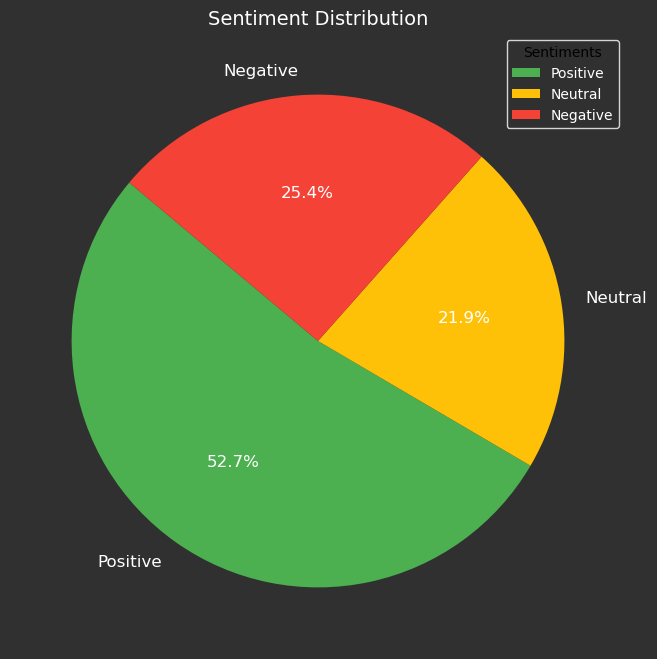

In [ ]:
import matplotlib.pyplot as plt

# Data
labels = ['Positive', 'Neutral', 'Negative']
sizes = [29792, 12388, 14391]  
colors = ['#4CAF50', '#FFC107', '#F44336']  

plt.figure(figsize=(8, 8), facecolor='#303030')  

wedges, texts, autotexts = plt.pie(
    sizes, labels=labels, autopct='%1.1f%%', colors=colors,
    startangle=140, textprops={'fontsize': 12, 'color': 'white'}
)

for text in texts:
    text.set_color('white')

for autotext in autotexts:
    autotext.set_color('white')

plt.title('Sentiment Distribution', fontsize=14, color='white')

plt.legend(title="Sentiments", loc="best", facecolor='#303030', edgecolor='white', labelcolor='white')

plt.show()
